In [102]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft

# from scipy.fft import fft
import pylab as pl

# from datetime import date
# import seaborn as sns
# import statsmodels.api as sm
# from pandas import Grouper
# from sagemaker.predictor import csv_serializer

# sns.set()

random_state = 123_456
np.random.seed(random_state)

In [16]:
# degrees to radians
# np.array((0., 30., 45., 60., 90.)) * np.pi / 180.

In [17]:
x = np.linspace(-np.pi, np.pi, 210)
x[:10]

array([-3.14159265, -3.11152957, -3.08146648, -3.05140339, -3.0213403 ,
       -2.99127722, -2.96121413, -2.93115104, -2.90108795, -2.87102487])

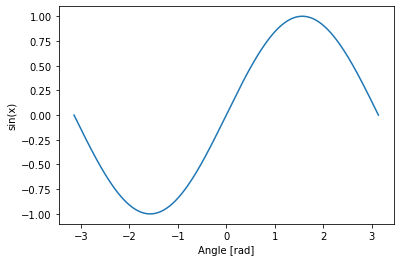

In [18]:
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
# plt.axis('tight')
plt.show()

In [83]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
# x
# y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.25*np.sin(80.0 * 2.0*np.pi*x)
x[:10]

array([0.        , 0.00125209, 0.00250417, 0.00375626, 0.00500835,
       0.00626043, 0.00751252, 0.00876461, 0.01001669, 0.01126878])

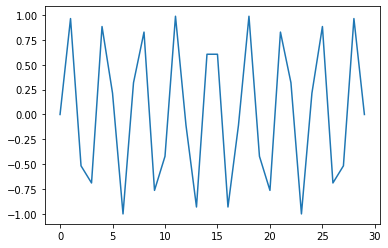

In [101]:
xx = np.linspace(0.0,N*T, 30)
plt.plot(np.sin(xx*np.pi*2.0*50))

In [84]:
y[:10]

array([ 0.        ,  0.53044742,  0.945959  ,  1.16215024,  1.14609297,
        0.92130898,  0.55610356,  0.14011464, -0.24235219, -0.53315833])

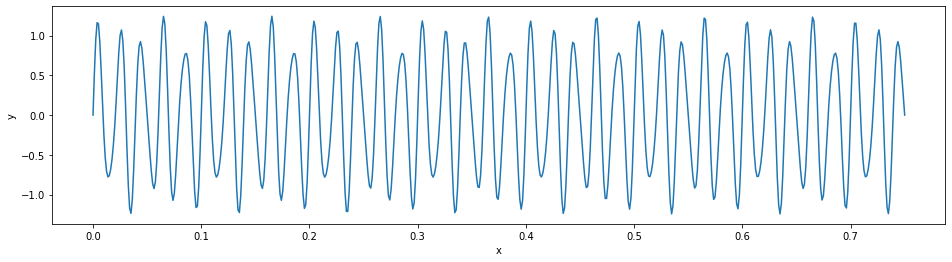

In [85]:
plt.figure(figsize = (16, 4))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
# plt.axis('tight')
plt.show()

In [86]:
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yf[:10]

array([5.01874111-0.j        , 5.02223026+0.02227389j,
       5.03272735+0.04465201j, 5.05032198+0.06724015j,
       5.0751656 +0.09014722j, 5.10747483+0.11348695j,
       5.14753626+0.13737973j, 5.19571294+0.16195468j,
       5.25245292+0.18735195j, 5.31830009+0.21372548j])

In [87]:
xf[:10]

array([ 0.        ,  1.33779264,  2.67558528,  4.01337793,  5.35117057,
        6.68896321,  8.02675585,  9.36454849, 10.70234114, 12.04013378])

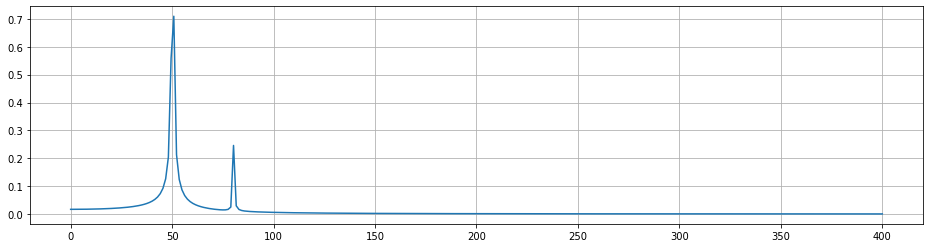

In [88]:
plt.figure(figsize = (16, 4))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [38]:
df = pd.read_csv('fuel-prices/all_years_combined.csv', index_col='date', dtype={'price': np.int32}, parse_dates=True)
df.set_index(pd.date_range(min(df.index), periods=df.size, freq='D'), inplace=True, verify_integrity=True)

In [39]:
df

price
2017-01-01   1417
2017-01-02   1436
2017-01-03   1409
2017-01-04   1542
2017-01-05   1582
...           ...
2019-12-27   1608
2019-12-28   1589
2019-12-29   1579
2019-12-30   1602
2019-12-31   1609

[1095 rows x 1 columns]

In [40]:
yf = fft(df.price)
yf[:10]

array([1715588.            -0.j        ,  -18022.97763824+41282.8064104j ,
         32480.65028442+34827.33845078j,   -5150.0199839 +23773.25671749j,
         10557.09795001-12315.31252528j,    7349.14909714+17686.91617139j,
        -13630.96244292+23579.02875977j,    5685.52889331 -7735.4424565j ,
          1960.07499734+10651.24410955j,    2041.42440782 -4030.90040673j])

In [41]:
len(yf)

1095

In [44]:
xf = [i for i in range(1,1096)]
len(xf)

1095

In [124]:
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
#     indexes = range(n)
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
#     indexes.reverse()
#     indexes = np.array(range(0,n))
#     sorted(indexes,key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

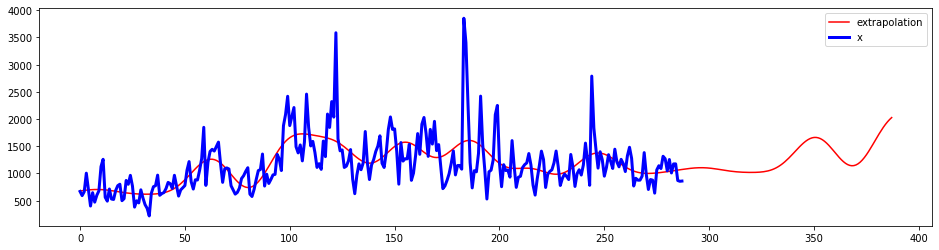

In [125]:
x = np.array([669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 1260, 562, 491, 714, 530, 521, 687, 776, 802, 499, 536, 871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, 219, 635, 756, 775, 969, 598, 630, 649, 722, 835, 812, 724, 966, 778, 584, 697, 737, 777, 1059, 1218, 848, 713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 1444, 1412, 1493, 1576, 1178, 836, 1087, 1101, 1082, 775, 698, 620, 651, 731, 906, 958, 1039, 1105, 620, 576, 707, 888, 1052, 1072, 1357, 768, 986, 816, 889, 973, 983, 1351, 1266, 1053, 1879, 2085, 2419, 1880, 2045, 2212, 1491, 1378, 1524, 1231, 1577, 2459, 1848, 1506, 1589, 1386, 1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 1416, 1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 888, 1155, 1254, 1403, 1502, 1692, 1187, 1110, 1382, 1808, 2039, 1810, 1819, 1408, 803, 1568, 1227, 1270, 1268, 1535, 873, 1006, 1328, 1733, 1352, 1906, 2029, 1734, 1314, 1810, 1540, 1958, 1420, 1530, 1126, 721, 771, 874, 997, 1186, 1415, 973, 1146, 1147, 1079, 3854, 3407, 2257, 1200, 734, 1051, 1030, 1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, 756, 1161, 1053, 1063, 932, 1604, 1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 785, 602, 903, 1142, 1410, 1256, 742, 985, 1037, 1067, 1196, 1412, 1127, 779, 911, 989, 946, 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558, 1223, 782, 2790, 1835, 1444, 1098, 1399, 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 1122, 1259, 1181, 1035, 1325, 1481, 1278, 769, 911, 876, 877, 950, 1383, 980, 705, 888, 877, 638, 1065, 1142, 1090, 1316, 1270, 1048, 1256, 1009, 1175, 1176, 870, 856, 860])
n_predict = 100
extrapolation = fourierExtrapolation(x, n_predict)
pl.figure(figsize = (16, 4))
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
pl.legend()
pl.show()

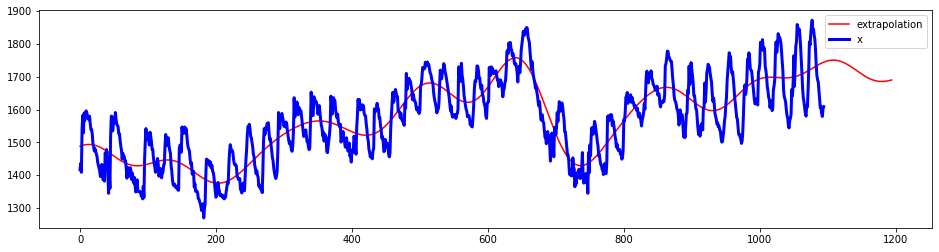

In [117]:
n_predict = 100
extrapolation = fourierExtrapolation(df.price.values, n_predict)
pl.figure(figsize = (16, 4))
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, df.price.size), df.price, 'b', label = 'x', linewidth = 3)
pl.legend()
pl.show()